# **Python Decorators**

## **What is a decorator in Python?**
* A decorator is a function that takes another function as an argument and extends its behavior without changing the original function explicitly.

* Let’s take a simple example to understand the concept.

* A simple Python decorator example
* The following defines a net_price function:


In [1]:
def net_price(price, tax):
    """ calculate the net price from price and tax
    Arguments:
        price: the selling price
        tax: value added tax or sale tax
    Return
        the net price
    """
    return price * (1 + tax)



* The net_price function calculates the net price from selling price and tax. It returns the net_price as a number.

* Suppose that you need to format the net price using the USD currency. For example, 100 becomes $100. To do it, you can use a decorator.

* By definition, a decorator is a function that takes a function as an argument:


In [2]:
def currency(fn):
    pass

* And it returns another function:


In [3]:
def currency(fn):
    def wrapper(*args, **kwargs):
        fn(*args, **kwargs)

    return wrapper

* The currency function returns the wrapper function. The wrapper function has the *args and **kwargs parameters.

* These parameters allow you to call any fn function with any combination of positional and keyword-only arguments.

* In this example, the wrapper function essentially executes the fn function directly and doesn’t change any behavior of the fn function.

* In the wrapper function, you can call the fn function, get its result, and format the result as a currency string:

In [4]:
def currency(fn):
    def wrapper(*args, **kwargs):
        result = fn(*args, **kwargs)
        return f'${result}'
    return wrapper

* The currency function is a decorator.

* It accepts any function that returns a number and formats that number as a currency string.

* To use the currency decorator, you need to pass the net_price function to it to get a new function and execute the new function as if it were the original function. For example:

In [5]:
net_price = currency(net_price)
print(net_price(100, 0.05))

$105.0


### **Python decorator definition**
* In general, a decorator is:

  * A function that takes another function (original function) as an argument and returns another function (or closure)
  * The closure typically accepts any combination of positional and keyword-only arguments.
  * The closure function calls the original function using the arguments passed to the closure and returns the result of the function.
  * The inner function is a closure because it references the fn argument from its enclosing scope or the decorator function.

### **The @ symbol**
* In the previous example, the currency is a decorator. And you can decorate the net_price function using the following syntax:


In [6]:
net_price = currency(net_price)

* Generally, if decorate is a decorator function and you want to decorate another function fn, you can use this syntax:
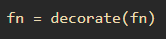

* To make it more convenient, Python provides a shorter way like this:
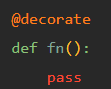

* For example, instead of using the following syntax:
image.png

* … you can decorate the net_price function using the @currency as follows:

In [8]:
@currency
def net_price(price, tax):
    """ calculate the net price from price and tax
    Arguments:
        price: the selling price
        tax: value added tax or sale tax
    Return
        the net price
    """
    return price * (1 + tax)

* Put it all together.

In [9]:
def currency(fn):
    def wrapper(*args, **kwargs):
        result = fn(*args, **kwargs)
        return f'${result}'
    return wrapper


@currency
def net_price(price, tax):
    """ calculate the net price from price and tax
    Arguments:
        price: the selling price
        tax: value added tax or sale tax
    Return
        the net price
    """
    return price * (1 + tax)


print(net_price(100, 0.05))

$105.0


### **Introspecting decorated functions**

* When you decorate a function:
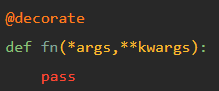

* It’s equivalent:
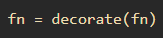

* The decorate function returns a new function, which is the wrapper function.

* If you use the built-in help function to show the documentation of the new function, you won’t see the documentation of the original function. For example:


In [10]:
help(net_price)

Help on function wrapper in module __main__:

wrapper(*args, **kwargs)



In [11]:
#Also, if you check the name of the new function, Python will return the name of the inner function returned by the decorator:
print(net_price.__name__)

wrapper


* So when you decorate a function, you’ll lose the original function signature and documentation.

* To fix this, you can use the wraps function from the functools standard module. In fact, the wraps function is also a decorator.

* The following shows how to use the wraps decorator:


In [12]:
from functools import wraps


def currency(fn):
    @wraps(fn)
    def wrapper(*args, **kwargs):
        result = fn(*args, **kwargs)
        return f'${result}'
    return wrapper


@currency
def net_price(price, tax):
    """ calculate the net price from price and tax
    Arguments:
        price: the selling price
        tax: value added tax or sale tax
    Return
        the net price
    """
    return price * (1 + tax)


help(net_price)
print(net_price.__name__)


Help on function net_price in module __main__:

net_price(price, tax)
    calculate the net price from price and tax
    Arguments:
        price: the selling price
        tax: value added tax or sale tax
    Return
        the net price

net_price


## **Python Decorator with Arguments**
### **Introduction to Python decorator with arguments**
* Suppose that you have a function called say that prints out a message:


In [13]:
def say(message):
    ''' print the message 
    Arguments
        message: the message to show
    '''
    print(message)

In [14]:
#and you want to execute the say() function 5 times repeatedly each time you call it. For example:
say('Hi')

Hi


* To do that, you can use a regular decorator:


In [18]:


#And you can define the repeat decorator as follows:
def repeat(fn):
    @wraps(fn)
    def wrapper(*args, **kwargs):
        for _ in range(5):
            result = fn(*args, **kwargs)
        return result

    return wrapper    


@repeat
def say(message):
    ''' print the message 
    Arguments
        message: the message to show
    '''
    print(message)

say('Hello')

Hello
Hello
Hello
Hello
Hello


* What if you want to execute the say() function repeatedly ten times. In this case, you need to change the hard-coded value 5 in the repeat decorator.

* However, this solution isn’t flexible. For example, you want to use the repeat decorator to execute a function 5 times and another 10 times. The repeat decorator would not meet the requirement.

* To fix this, you need to change the repeat decorator so that it accepts an argument that specifies the number of times a function should execute like this:
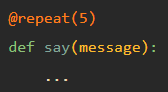

* To define the repeat decorator, the repeat(5) should return the original decorator.
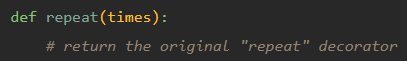

* The new repeat function returns a decorator. And it’s often referred to as a decorator factory.

* The following repeat function returns a decorator:


In [20]:
def repeat(times):
    ''' call a function a number of times '''
    def decorate(fn):
        @wraps(fn)
        def wrapper(*args, **kwargs):
            for _ in range(times):
                result = fn(*args, **kwargs)
            return result
        return wrapper
    return decorate


* In this code, the decorate function is a decorator. It’s equivalent to the original repeat decorator.

* Note that the new repeat function isn’t a decorator. It’s a decorator factory that returns a decorator.

* Put it all together.

In [21]:
from functools import wraps


def repeat(times):
    ''' call a function a number of times '''
    def decorate(fn):
        @wraps(fn)
        def wrapper(*args, **kwargs):
            for _ in range(times):
                result = fn(*args, **kwargs)
            return result
        return wrapper
    return decorate


@repeat(10)
def say(message):
    ''' print the message 
    Arguments
        message: the message to show
    '''
    print(message)


say('Hello')


Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello


## **Python Class Decorators**
### **Introduction to the Python class decorators**
* So far you have learned how to use functions to define decorators.

* For example, the following star function prints out a number of * characters before and after calling the decorated function:


In [22]:
def star(n):
    def decorate(fn):
        def wrapper(*args, **kwargs):
            print(n*'*')
            result = fn(*args, **kwargs)
            print(result)
            print(n*'*')
            return result
        return wrapper
    return decorate

* The star is a decorator factory that returns a decorator. It accepts an argument that specifies the number of * characters to display.

* The following illustrates how to use the star decorator factory:

In [23]:
@star(5)
def add(a, b):
    return a + b


add(10, 20)

*****
30
*****


30

* The star() decorator factory takes an argument and returns a callable. The callable takes an argument (fn) which is a function that will be decorated. Also, the callable can access the argument (n) passed to the decorator factory.

* A class instance can be a callable when it implements the __call__ method. Therefore, you can make the __call__ method as a decorator.

* The following example rewrites the star decorator factory using a class instead:


In [24]:
class Star:
    def __init__(self, n):
        self.n = n

    def __call__(self, fn):
        def wrapper(*args, **kwargs):
            print(self.n*'*')
            result = fn(*args, **kwargs)
            print(result)
            print(self.n*'*')
            return result
        return wrapper

In [25]:
#And you can use the Star class as a decorator like this:
@Star(5)
def add(a, b):
    return a + b

In [26]:
#The @Star(5) returns an instance of the Star class. That instance is a callable, so you can do something like:
add = Star(5)(add)

* So you can use callable classes to decorate functions.

* Put it all together:

In [27]:
from functools import wraps


class Star:
    def __init__(self, n):
        self.n = n

    def __call__(self, fn):
        @wraps(fn)
        def wrapper(*args, **kwargs):
            print(self.n*'*')
            result = fn(*args, **kwargs)
            print(result)
            print(self.n*'*')
            return result
        return wrapper


@Star(5)
def add(a, b):
    return a + b


add(10, 20)

*****
30
*****


30